In [40]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report

In [41]:
df = pd.read_csv("../../data/classification_ready_data.csv")

df.shape

(826155, 17)

In [42]:
df.sample(6)

,engine_capacity,vehicle_type,age_of_driver,longitude,latitude,cluster_1,day_of_year,rltv_hum,air_temperature,hour,wind_speed,wind_direction,ground_state_id,cld_ttl_amt_id,dewpoint,age_of_vehicle,accident
177343,3496.0,2.0,26.0,-1.108609,53.518538,13373.0,130.0,70.000000,11.600000,10.0,13.000000,360.000000,4.000000,3.000000,6.400000,5.0,0.0
798562,1343.0,18.0,32.0,-0.757118,51.583036,23179.0,61.0,88.800000,-0.700000,21.0,3.000000,110.000000,1.000000,0.000000,-1.900000,12.0,0.0
80672,2497.0,9.0,19.0,-1.746403,52.379123,36814.0,224.0,84.900000,13.400000,16.0,10.000000,10.000000,0.000000,8.000000,10.900000,8.0,1.0
787011,1958.0,18.0,67.0,-1.218724,54.665273,14551.0,305.0,93.305104,9.578138,22.0,13.426373,220.509627,8.210837,7.245690,8.482980,11.0,0.0
793498,1400.0,9.0,60.0,-3.727957,53.295053,29768.0,327.0,91.598581,5.734909,11.0,6.306245,202.560757,9.996251,3.499413,4.428047,5.0,1.0
242641,1120.0,9.0,18.0,-2.975955,53.394548,7874.0,56.0,72.900000,8.300000,15.0,4.000000,300.000000,6.422721,4.000000,3.700000,10.0,1.0


In [43]:
df.columns

Index(['engine_capacity', 'vehicle_type', 'age_of_driver', 'longitude',
       'latitude', 'cluster_1', 'day_of_year', 'rltv_hum', 'air_temperature',
       'hour', 'wind_speed', 'wind_direction', 'ground_state_id',
       'cld_ttl_amt_id', 'dewpoint', 'age_of_vehicle', 'accident'],
      dtype='object')

### data split

In [44]:
all_feature_cols = list(df.columns)
all_feature_cols.remove('accident')

X = df[all_feature_cols] 
y = df['accident']

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train dimension = ', X_train.shape)
print('X_test  dimension = ', X_test.shape)
print('y_train dimension = ', y_train.shape)
print('y_train dimension = ', y_test.shape)

X_train dimension =  (578308, 16)
X_test  dimension =  (247847, 16)
y_train dimension =  (578308,)
y_train dimension =  (247847,)


### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(dual=False, max_iter=120000)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=120000)

In [46]:
y_pred = model_logreg.predict(X_test)
print("Accuracy [LOG REG]:",metrics.accuracy_score(y_test, y_pred))
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy [LOG REG]: 0.7457382982243077


              precision    recall  f1-score   support

         0.0       0.79      0.59      0.68    112651
         1.0       0.72      0.87      0.79    135196

    accuracy                           0.75    247847
   macro avg       0.76      0.73      0.73    247847
weighted avg       0.75      0.75      0.74    247847



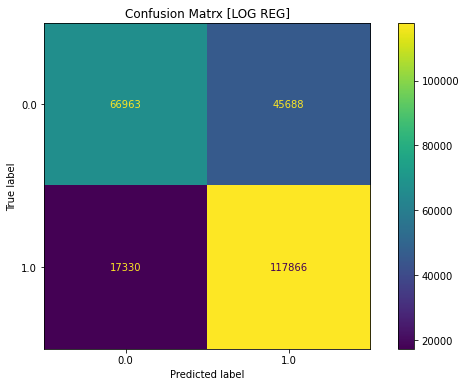

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [LOG REG]')
disp =metrics.plot_confusion_matrix(model_logreg, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train,y_train)

In [ ]:
y_pred = model_svm.predict(X_test)
print("Accuracy [SVM]:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [SVM]')
disp =metrics.plot_confusion_matrix(model_svm, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
model_rf = RandomForestClassifier(random_state=43)      
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

In [49]:
y_pred = model_rf.predict(X_test)
print("Accuracy [RFC]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [RFC]: 0.9694529286212865


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97    112651
         1.0       0.97      0.98      0.97    135196

    accuracy                           0.97    247847
   macro avg       0.97      0.97      0.97    247847
weighted avg       0.97      0.97      0.97    247847



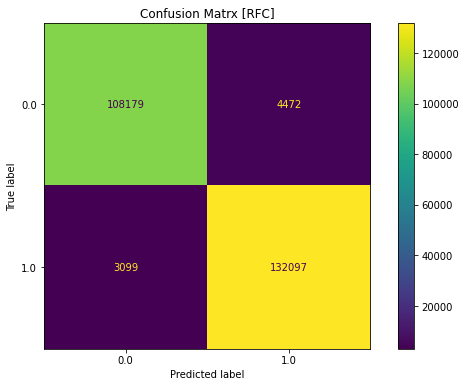

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [RFC]')
disp =metrics.plot_confusion_matrix(model_rf, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### Decision Tree 

In [51]:
from sklearn.tree import DecisionTreeClassifier

model_dt_clf_1 = DecisionTreeClassifier()
model_dt_clf_1.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = model_dt_clf_1.predict(X_test)
print("Accuracy [Decision Tree (gini)]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [Decision Tree (gini)]: 0.9638728731838594


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    112651
         1.0       0.97      0.97      0.97    135196

    accuracy                           0.96    247847
   macro avg       0.96      0.96      0.96    247847
weighted avg       0.96      0.96      0.96    247847



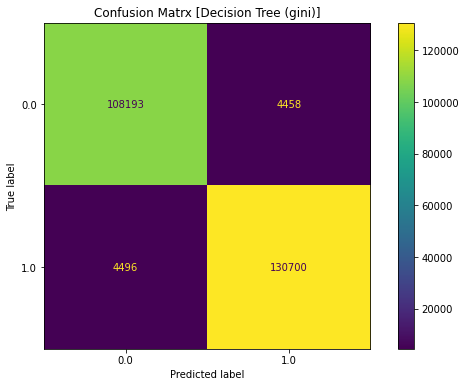

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [Decision Tree (gini)]')
disp =metrics.plot_confusion_matrix(model_dt_clf_1, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

In [54]:
model_dt_clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_dt_clf_2 = model_dt_clf_2.fit(X_train,y_train)

In [55]:
y_pred = model_dt_clf_2.predict(X_test)
print("Accuracy [Decision Tree (entropy)]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [Decision Tree (entropy)]: 0.8560603920967371


              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86    112651
         1.0       0.96      0.77      0.85    135196

    accuracy                           0.86    247847
   macro avg       0.87      0.86      0.86    247847
weighted avg       0.88      0.86      0.86    247847



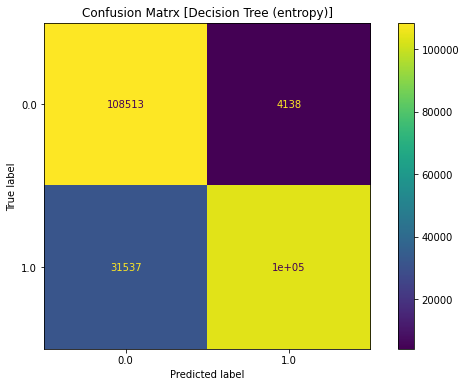

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [Decision Tree (entropy)]')
disp =metrics.plot_confusion_matrix(model_dt_clf_2, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

# output

Random Forest Classifier and Decision Tree with gini criterion have higher accuracy >96

In [57]:
# import pickle

import joblib  # it may be better to use joblib’s replacement of pickle 


# serialize models

# pickle.dump(model_rf, open('./models/rf_v1.model', 'wb'))
# pickle.dump(model_dt_clf_1, open('./models/dt_v1.model', 'wb'))

# compress pickles as random forest model is too large
joblib.dump(model_rf, './models/rf_v2.compressed', compress=('zlib',9))
joblib.dump(model_dt_clf_1, './models/dt_v2.compressed', compress=('zlib',1))


['./models/dt_v2.compressed']

In [58]:
record_template = df.head(1)
record_template = record_template.drop(['accident'], axis=1)
record_template.loc[0,record_template.columns] = np.nan
joblib.dump(record_template, "./models/record_v2.template")

['./models/record_v2.template']

Get some data for usit testing

In [59]:
test_data = df.sample(10)
test_data

,engine_capacity,vehicle_type,age_of_driver,longitude,latitude,cluster_1,day_of_year,rltv_hum,air_temperature,hour,wind_speed,wind_direction,ground_state_id,cld_ttl_amt_id,dewpoint,age_of_vehicle,accident
131044,1392.0,9.0,59.0,-1.455565,53.419588,13739.0,241.0,60.500000,12.200000,20.0,0.000000,0.000000,1.000000,8.000000,4.800000,13.0,1.0
785808,1744.0,19.0,11.0,-2.169272,53.388529,34395.0,57.0,84.400000,5.900000,2.0,8.000000,270.000000,9.966551,7.000000,3.600000,6.0,0.0
620978,1390.0,9.0,35.0,-2.241664,53.480179,8191.0,177.0,54.800000,23.600000,12.0,5.000000,180.000000,8.176260,7.831439,13.900000,1.0,1.0
311918,1956.0,5.0,50.0,0.058304,51.424728,2807.0,279.0,88.560965,10.357754,18.0,9.843865,200.474360,8.210765,4.203921,8.502210,3.0,0.0
703464,2874.0,97.0,85.0,-4.063975,51.745943,30490.0,253.0,87.026141,12.184421,0.0,11.420053,284.307115,6.419857,5.746491,10.080334,9.0,0.0
137488,998.0,9.0,31.0,-1.473296,53.360611,13918.0,8.0,88.837741,3.294956,15.0,14.142973,237.738527,7.500547,1.950249,1.850426,1.0,1.0
103151,1590.0,9.0,35.0,1.374845,52.110725,45579.0,218.0,95.836695,12.266298,8.0,7.780124,213.816267,9.967635,4.370944,11.606114,4.0,1.0
543968,119.0,16.0,38.0,-0.123377,51.568425,702.0,162.0,90.645909,12.769869,12.0,13.756563,284.805862,8.207511,7.975361,11.229344,12.0,0.0
30781,1679.0,9.0,37.0,-2.004398,52.614487,15789.0,321.0,98.600000,9.200000,10.0,8.494024,160.423585,6.419979,7.985855,9.000000,12.0,1.0
555198,4500.0,11.0,31.0,-0.032725,51.512354,1260.0,221.0,86.376058,13.867414,10.0,11.617130,285.795727,6.419979,7.822546,11.561640,4.0,1.0


In [65]:
# import json
# print (json.dumps(test_data, indent=2, default=str))
test_records = []
for record in test_data.to_dict('records'):
    acc = record['accident']
    del record['accident']
    
    test_records.append({
        'input': record,
        'accident': acc
    })

In [66]:
test_records

[{'input': {'engine_capacity': 1392.0,
   'vehicle_type': 9.0,
   'age_of_driver': 59.0,
   'longitude': -1.455565,
   'latitude': 53.419588,
   'cluster_1': 13739.0,
   'day_of_year': 241.0,
   'rltv_hum': 60.5,
   'air_temperature': 12.2,
   'hour': 20.0,
   'wind_speed': 0.0,
   'wind_direction': 0.0,
   'ground_state_id': 1.0,
   'cld_ttl_amt_id': 8.0,
   'dewpoint': 4.8,
   'age_of_vehicle': 13.0},
  'accident': 1.0},
 {'input': {'engine_capacity': 1744.0,
   'vehicle_type': 19.0,
   'age_of_driver': 11.0,
   'longitude': -2.1692720000000003,
   'latitude': 53.38852900000001,
   'cluster_1': 34395.0,
   'day_of_year': 57.0,
   'rltv_hum': 84.4,
   'air_temperature': 5.9,
   'hour': 2.0,
   'wind_speed': 8.0,
   'wind_direction': 270.0,
   'ground_state_id': 9.966551125033217,
   'cld_ttl_amt_id': 7.0,
   'dewpoint': 3.6,
   'age_of_vehicle': 6.0},
  'accident': 0.0},
 {'input': {'engine_capacity': 1390.0,
   'vehicle_type': 9.0,
   'age_of_driver': 35.0,
   'longitude': -2.241664,